In [1]:
import pandas as pd

df = pd.read_excel('../data/alpg-min.xlsx')
#print(df.head())
#df.tail()

In [2]:
perjam = []
yy = 60
for xx in range (0, 525600, 60):
    jum = df['minutes'][xx:xx+yy].sum()
    perjam.append(jum)
    #print(zz)

In [3]:
#kumpulkan semua yang sama jam
per24 = []
dff = []
for yy in range (0,24):  # iterator jam 0 - 23
   
    per24.append(int(yy))
    for xx in range (0,8760):
        if xx % 24 == yy:      # yy jam ybs
            jum = perjam[xx]
            per24.append(jum)  # simpam setiap jam yang sama
            
    zz = per24.copy()
    dff.append(zz)
    per24.clear()

In [4]:
#tulis perjam
datatgl = pd.DataFrame(dff).T
#dataMenit.to_csv('../hasil/hourly-liguria15X.csv', index=False, header=[ ' date','temp'])
#datatgl.to_csv('../data/alpg_per24.csv', header = 0, index=False)
datatgl.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
1,0.008021,0.006857,0.006866,0.007089,0.007031,0.006968,0.006857,0.008392,0.010247,0.012321,...,0.013926,0.018040,0.021402,0.026710,0.024440,0.025737,0.023585,0.019741,0.015876,0.007110
2,0.006842,0.006989,0.007120,0.006923,0.006869,0.006869,0.007730,0.013460,0.012572,0.008831,...,0.010916,0.010704,0.015042,0.027731,0.024131,0.019392,0.019943,0.016943,0.013468,0.008852
3,0.007005,0.007046,0.006891,0.006823,0.006886,0.006917,0.008765,0.011438,0.011148,0.007678,...,0.008761,0.009055,0.015573,0.021743,0.029833,0.030423,0.024283,0.019615,0.018971,0.009944
4,0.006920,0.006823,0.006823,0.006863,0.006954,0.007040,0.007714,0.013430,0.013531,0.009393,...,0.010988,0.011473,0.015956,0.023985,0.042997,0.018712,0.024008,0.022878,0.014438,0.009094


In [21]:
## cek isi list apakas sesuai urutan
# 0 = baris 8 excel = Rabu, 52 hari
# 1 = baris 2 excel = Kamis, 53 hari
# 2 = baris 3 excel = Jumat, 52 hari
# 3 = baris 4 excel = Sabtu, 52 hari
# 4 = baris 5 excel = Minggu, 52 hari
# 5 = baris 6 excel = Senin, 52 hari
# 6 = baris 7 excel = Selasa, 52 hari

dw24no = []
dw24no2 = []
for kol in range (0,24):
    for bar in range (1,366):
        if bar % 7 == 1:  #  0 = baris 8 excel = Rabu
            jum = datatgl[kol][bar] 
            dw24no.append(jum) 
    
    aa = dw24no.copy()
    dw24no2.append(aa)
    dw24no.clear()

len(dw24no2[23])

53

In [45]:
jum = 0
sen = []
for kol in range (0,24):
    for bar in range (1,365):
        if bar % 7 == 0:  # 
            jum += datatgl[kol][bar] 
    sen.append(jum/52) # rata-rata
    jum = 0

sen

[0.00691288269754839,
 0.006932379096578663,
 0.006936078355036462,
 0.006913737902460675,
 0.0069328592614629715,
 0.00693738531270972,
 0.006913595841844016,
 0.0074431182668031675,
 0.009065030009622811,
 0.011691935378934364,
 0.013516559098089291,
 0.013161873515264615,
 0.013976227476624916,
 0.012866239689572727,
 0.012398567615894536,
 0.012032787098908797,
 0.013267958701360837,
 0.018562327746040073,
 0.021439734283130982,
 0.021905863578512246,
 0.018834547140894244,
 0.016678388037005373,
 0.014868672158962627,
 0.00746980861546105]

In [46]:
hari = ['rabu','kamis','jumat','sabtu','minggu','Senin','Selasa']
jhar = [52,53,52,52,52,52,52]
jum = 0
sen = []
har = []
for dw in range (7):
    
    for kol in range (0,24):
        for bar in range (1,365):
            if bar % 7 == dw:  # 
                jum += datatgl[kol][bar] 
        sen.append(jum/jhar[dw]) # rata-rata
        jum = 0
    
    aa = sen.copy()
    har.append(aa)
    sen.clear()
len(har)

7

In [47]:
#tulis perjam
datatgl3 = pd.DataFrame(har)
#dataMenit.to_csv('../hasil/hourly-liguria15X.csv', index=False, header=[ ' date','temp'])
datatgl3.to_csv('../data/alpg_dw.csv', header = 0, index=False)
datatgl3.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.006913,0.006932,0.006936,0.006914,0.006933,0.006937,0.006914,0.007443,0.009065,0.011692,...,0.012399,0.012033,0.013268,0.018562,0.021440,0.021906,0.018835,0.016678,0.014869,0.007470
1,0.006802,0.006799,0.006806,0.006786,0.006803,0.006807,0.006781,0.007242,0.008824,0.011237,...,0.011712,0.012313,0.013320,0.016086,0.019245,0.022541,0.019655,0.017516,0.014452,0.007264
2,0.006911,0.006932,0.006942,0.006913,0.006930,0.006935,0.008106,0.011981,0.009764,0.008038,...,0.009240,0.009818,0.012735,0.019734,0.021345,0.020038,0.020334,0.018520,0.014561,0.008632
3,0.006916,0.006935,0.006937,0.006911,0.006931,0.006937,0.007927,0.011395,0.009716,0.007635,...,0.008897,0.009363,0.013883,0.020695,0.023577,0.020520,0.020306,0.018601,0.014698,0.009080
4,0.006914,0.006931,0.006936,0.006912,0.006933,0.006941,0.008173,0.012048,0.010527,0.008764,...,0.010788,0.010723,0.013281,0.021396,0.020335,0.019842,0.019008,0.017486,0.013897,0.008520


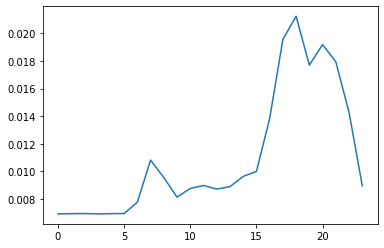

In [54]:
import matplotlib.pyplot as plt 
plt.plot(har[6])

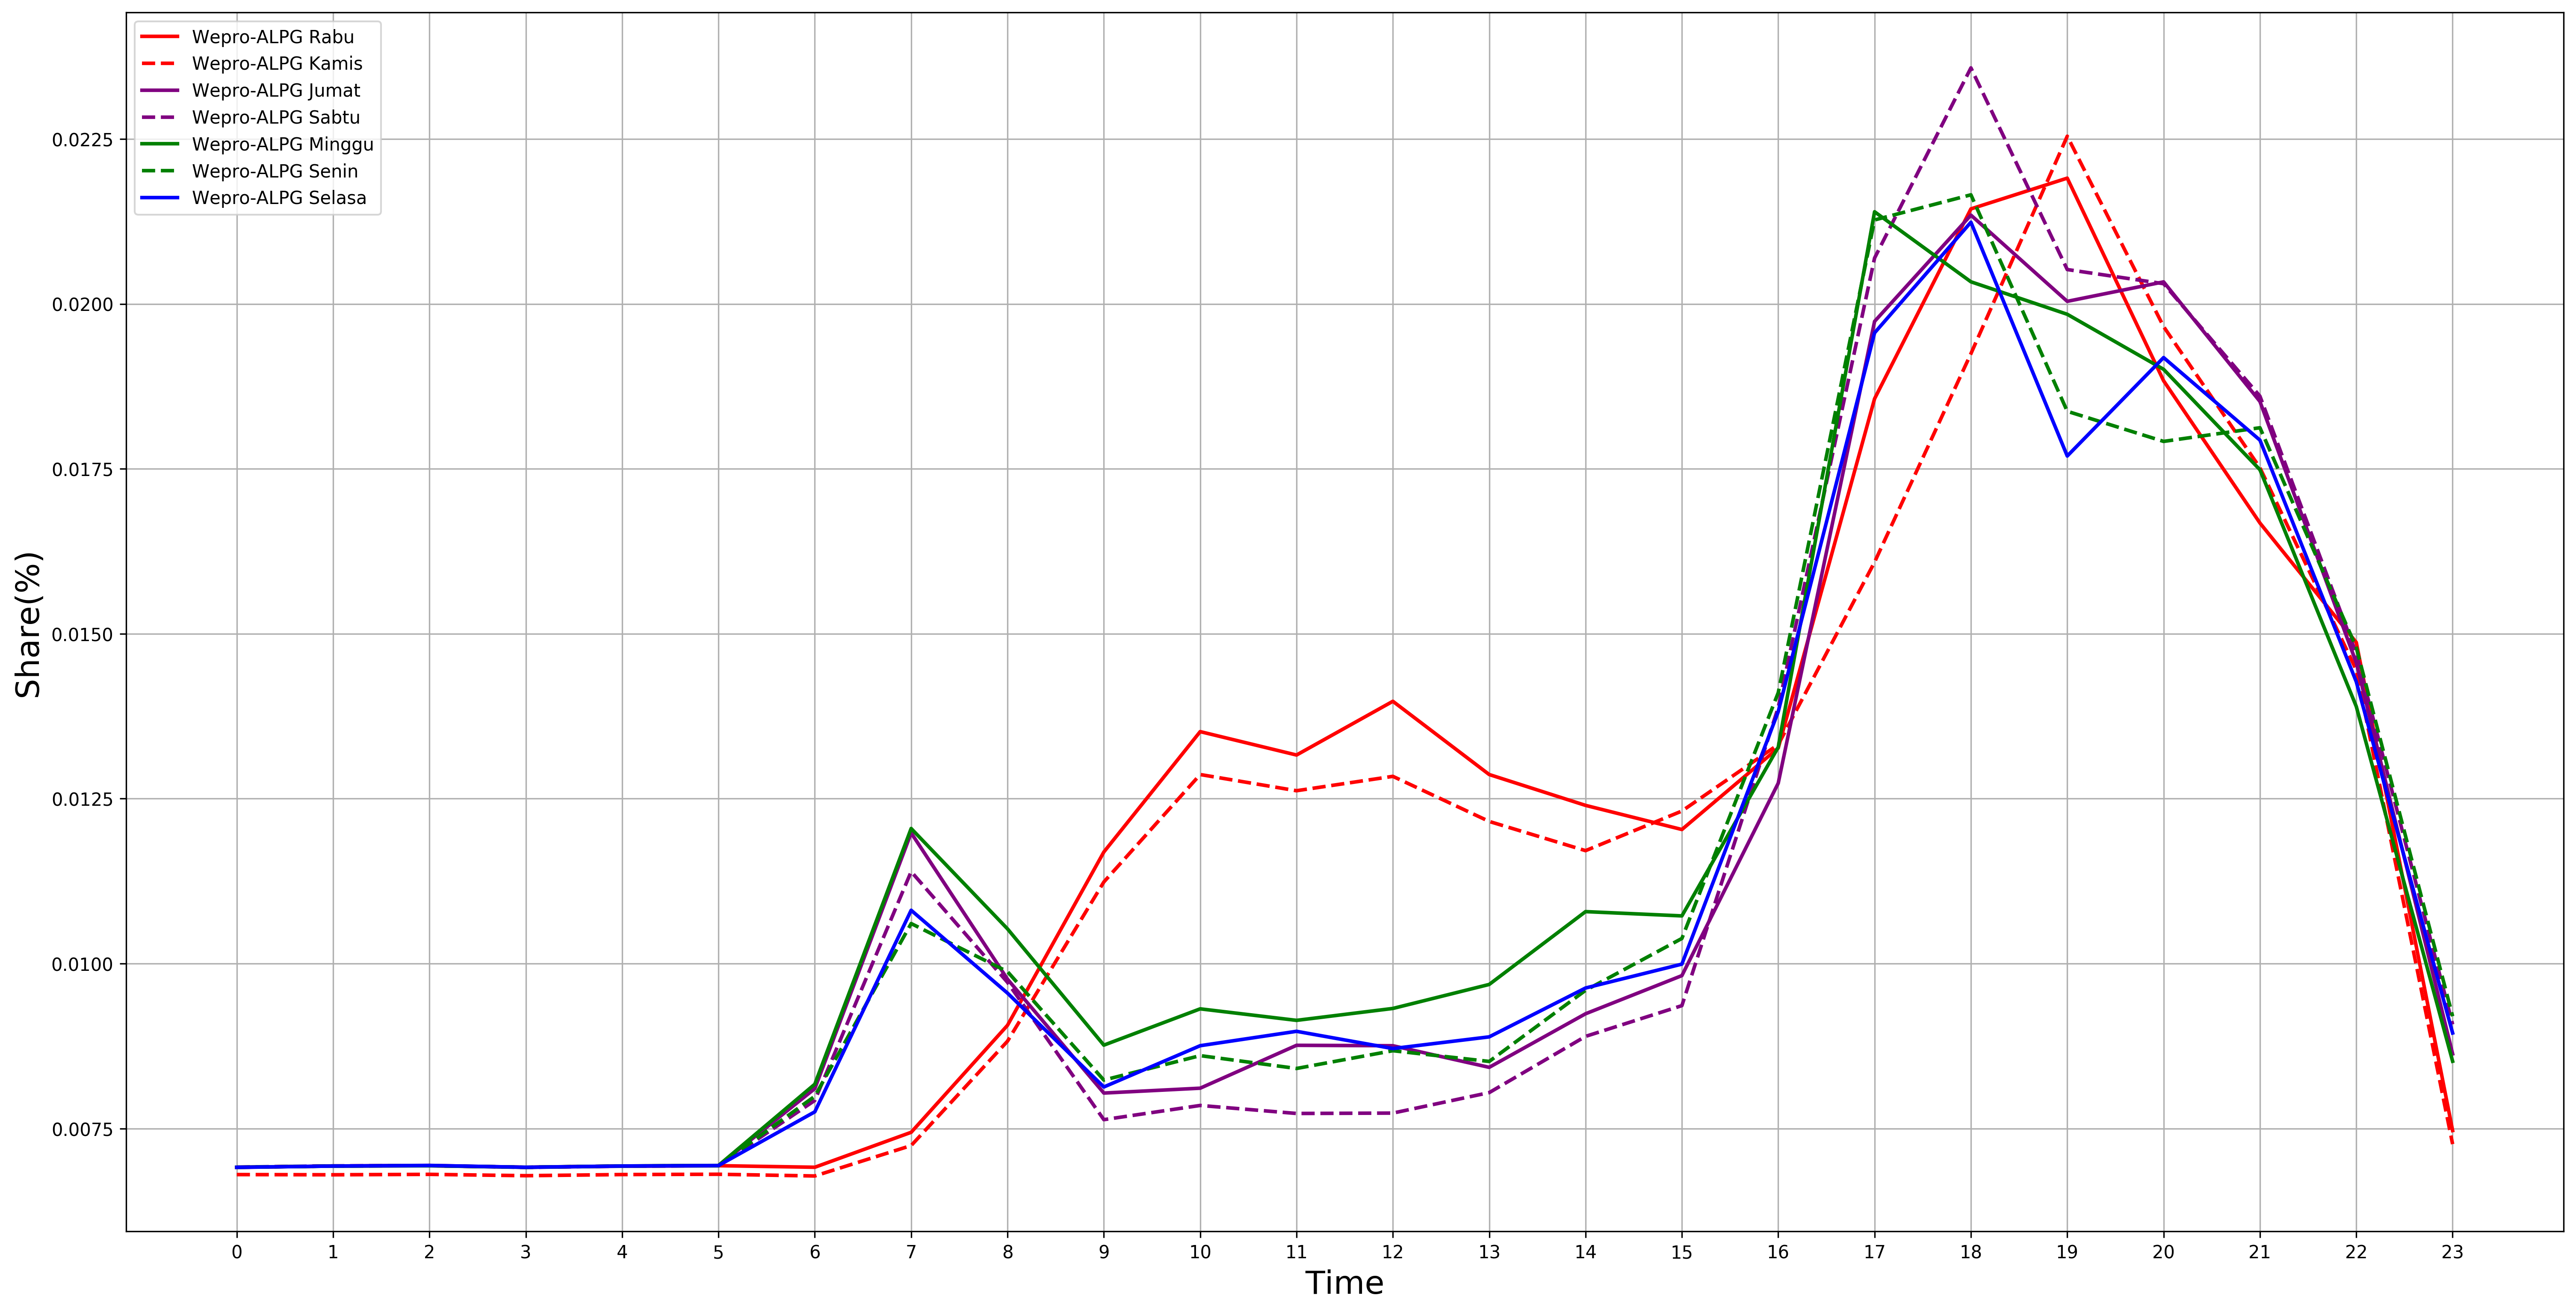

In [55]:
## cacade plot

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,10), dpi=300)
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)

plt.subplot(1,1,1)
plt.gca().grid(True)
plt.plot(har[0], color="red",    linewidth=2, linestyle='-'     ,label="Wepro-ALPG Rabu")
plt.plot(har[1], color="red",    linewidth=2, linestyle='dashed',label="Wepro-ALPG Kamis")
plt.plot(har[2], color="purple", linewidth=2, linestyle='-'     ,label="Wepro-ALPG Jumat")
plt.plot(har[3], color="purple", linewidth=2, linestyle='dashed',label="Wepro-ALPG Sabtu")
plt.plot(har[4], color="green",  linewidth=2, linestyle='-'     ,label="Wepro-ALPG Minggu")
plt.plot(har[5], color="green",  linewidth=2, linestyle='dashed',label="Wepro-ALPG Senin")
plt.plot(har[6], color="blue",   linewidth=2, linestyle='-'     ,label="Wepro-ALPG Selasa")
plt.legend(loc='upper left', frameon=True)
plt.ylabel('Share(%)', fontsize=18)    
plt.xlabel('Time', fontsize=18)
plt.xticks(range(24))
plt.tick_params(which='both',labelbottom=True)


plt.savefig('ALPG weekdays.png', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='legal', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.5)

plt.show()

In [ ]:
import numpy as np 
#samua = np.add(jum, jum1)
hari = ['Senin','Selasa','rabu','kamis','jumat','sabtu','minggu']
dw24 = []
d7 = []
jum = 0
for dw in range (7):
    #dw24.append(hari[dw])
    for bar in range (1,366):
        if bar % 7 == dw:  # 
            jum = datatgl[bar:bar+1]          
            dw24.append(jum) 
    
    aa = dw24.copy()
    d7.append(aa)
    dw24.clear()

In [ ]:
#tulis perjam
datatgl2 = pd.DataFrame(d7).T
#dataMenit.to_csv('../hasil/hourly-liguria15X.csv', index=False, header=[ ' date','temp'])
datatgl2.to_csv('../data/alpg_d7.csv', header = 0, index=False)
datatgl2.head()

In [ ]:
## Sum of listing

def sumOfList(list, size): 
   if (size == 0): 
     return 0
   else: 
     return list[size - 1] + sumOfList(list, size - 1) 
   
# Driver code      
total = sumOfList(dw24, len(dw24)) 
total

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(dfff)

In [ ]:
#https://dev.to/renegadecoder94/how-to-sum-elements-of-two-lists-in-python-17c7
ethernet_devices = [1, [7], [2], [8374163], [84302738]]
usb_devices = [1, [7], [1], [2314567], [0]]

# The long way
all_devices = [
    ethernet_devices[0] + usb_devices[0],
    ethernet_devices[1] + usb_devices[1],
    ethernet_devices[2] + usb_devices[2],
    ethernet_devices[3] + usb_devices[3],
    ethernet_devices[4] + usb_devices[4]
]

# Some comprehension magic
all_devices = [x + y for x, y in zip(ethernet_devices, usb_devices)]

# Let's use maps
import operator 
all_devices = list(map(operator.add, ethernet_devices, usb_devices))

# We can't forget our favorite computation library
import numpy as np 
all_devices = np.add(ethernet_devices, usb_devices)

In [ ]:
d1 = senin[0]
d2 = senin[1]
d3 = senin[2]

import numpy as np 
samua = np.add(d1, d3)
samua